In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Read in the data

- timestamp - A timestamp for the minute covered by the row.
- Asset_ID - An ID code for the cryptoasset.
- Count - The number of trades that took place this minute.
- Open - The USD price at the beginning of the minute.
- High - The highest USD price during the minute.
- Low - The lowest USD price during the minute.
- Close - The USD price at the end of the minute.
- Volume - The number of cryptoasset units traded during the minute.
- VWAP - The volume weighted average price for the minute.
- Target - 15 minute residualized returns. 

In [3]:
crypto_df = pd.read_csv('Resources/train.csv')
crypto_df.head(20)

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.580000,2399.5000,2357.1400,2374.590000,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.530000,8.5300,8.5300,8.530000,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.194000,14013.8000,13666.1100,13850.176000,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.659600,7.6596,7.6567,7.657600,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.920000,25.9200,25.8740,25.877000,121.087310,25.891363,-0.008264
5,1514764860,6,173.0,738.302500,746.0000,732.5100,738.507500,335.987856,738.839291,-0.004809
6,1514764860,9,167.0,225.330000,227.7800,222.9800,225.206667,411.896642,225.197944,-0.009791
7,1514764860,11,7.0,329.090000,329.8800,329.0900,329.460000,6.635710,329.454118,NaN
8,1514764920,2,53.0,2374.553333,2400.9000,2354.2000,2372.286667,24.050259,2371.434498,-0.004079
9,1514764920,0,7.0,8.530000,8.5300,8.5145,8.514500,71.390000,8.520215,-0.015875


In [4]:
asset_df = pd.read_csv('Resources/asset_details.csv')
asset_df

,Asset_ID,Weight,Asset_Name
0,2,2.397895,Bitcoin Cash
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
3,5,1.386294,EOS.IO
4,7,2.079442,Ethereum Classic
5,6,5.894403,Ethereum
6,9,2.397895,Litecoin
7,11,1.609438,Monero
8,13,1.791759,TRON
9,12,2.079442,Stellar


### Clean the dataset

In [5]:
# check the datatypes and counts of each column
crypto_df.info(show_counts =True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24236806 entries, 0 to 24236805
Data columns (total 10 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   timestamp  24236806 non-null  int64  
 1   Asset_ID   24236806 non-null  int64  
 2   Count      24236806 non-null  float64
 3   Open       24236806 non-null  float64
 4   High       24236806 non-null  float64
 5   Low        24236806 non-null  float64
 6   Close      24236806 non-null  float64
 7   Volume     24236806 non-null  float64
 8   VWAP       24236797 non-null  float64
 9   Target     23486468 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 1.8 GB


In [6]:
# double check the missing values in each column 
crypto_df.isnull().sum()

timestamp         0
Asset_ID          0
Count             0
Open              0
High              0
Low               0
Close             0
Volume            0
VWAP              9
Target       750338
dtype: int64

In [7]:
# replace NaN Values with Zeros in Target column
crypto_df["Target"] = crypto_df["Target"].fillna(0)
crypto_df.head(10)

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.580000,2399.5000,2357.1400,2374.590000,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.530000,8.5300,8.5300,8.530000,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.194000,14013.8000,13666.1100,13850.176000,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.659600,7.6596,7.6567,7.657600,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.920000,25.9200,25.8740,25.877000,121.087310,25.891363,-0.008264
5,1514764860,6,173.0,738.302500,746.0000,732.5100,738.507500,335.987856,738.839291,-0.004809
6,1514764860,9,167.0,225.330000,227.7800,222.9800,225.206667,411.896642,225.197944,-0.009791
7,1514764860,11,7.0,329.090000,329.8800,329.0900,329.460000,6.635710,329.454118,0.000000
8,1514764920,2,53.0,2374.553333,2400.9000,2354.2000,2372.286667,24.050259,2371.434498,-0.004079
9,1514764920,0,7.0,8.530000,8.5300,8.5145,8.514500,71.390000,8.520215,-0.015875


In [8]:
# show all Rows with NaN Values in VWAP column
# from the output below we can see that all the nan values come from Asset_ID 10
crypto_df[crypto_df["VWAP"].isnull()]

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
15004269,1592173560,10,2.0,501.00,501.00,501.00,501.00,0.0,NaN,0.000000
15004283,1592173620,10,4.0,501.00,501.00,501.00,501.00,0.0,NaN,0.000000
15059232,1592426160,10,2.0,529.77,529.77,529.77,529.77,0.0,NaN,0.007356
15143187,1592823720,10,2.0,503.60,503.60,503.60,503.60,0.0,NaN,-0.005672
15183088,1593008940,10,2.0,484.16,484.16,484.16,484.16,0.0,NaN,-0.004281
15184216,1593013920,10,2.0,480.00,480.00,480.00,480.00,0.0,NaN,0.000000
15184243,1593014040,10,2.0,480.00,480.00,480.00,480.00,0.0,NaN,0.000000
15184309,1593014340,10,6.0,479.07,479.07,479.07,479.07,0.0,NaN,0.000000
15184778,1593016440,10,4.0,478.00,478.00,475.00,478.00,0.0,NaN,0.000000


In [9]:
# when I clean the data, I found a lot of gaps in data, which influence the consecutive of data visualisation 
# to fill the gaps, we can use the .reindex() method for forward filling, filling gaps with the previous valid value
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reindex.html

In [10]:
# I may code these following steps with function define later to fill gaps for each cryptocurrencies
# fill gaps for Bitcoin Cash
bit_cash = crypto_df[crypto_df["Asset_ID"]==2].set_index("timestamp")
bit_cash = bit_cash.reindex(range(bit_cash.index[0],bit_cash.index[-1]+60,60),method='pad')
(bit_cash.index[1:]-bit_cash.index[:-1]).value_counts()

60    1956959
Name: timestamp, dtype: int64

In [11]:
# fill gaps for Binance Coin
bin_coin = crypto_df[crypto_df["Asset_ID"]==0].set_index("timestamp")
bin_coin = bin_coin.reindex(range(bin_coin.index[0],bin_coin.index[-1]+60,60),method='pad')
(bin_coin.index[1:]-bin_coin.index[:-1]).value_counts()

60    1956959
Name: timestamp, dtype: int64

In [12]:
# fill gaps for Bitcoin 
bit = crypto_df[crypto_df["Asset_ID"]==1].set_index("timestamp")
bit = bit.reindex(range(bit.index[0],bit.index[-1]+60,60),method='pad')
(bit.index[1:]-bit.index[:-1]).value_counts()

60    1956959
Name: timestamp, dtype: int64

In [13]:
# fill gaps for EOS.IO
eos = crypto_df[crypto_df["Asset_ID"]==5].set_index("timestamp")
eos = eos.reindex(range(eos.index[0],eos.index[-1]+60,60),method='pad')
(eos.index[1:]-eos.index[:-1]).value_counts()

60    1956959
Name: timestamp, dtype: int64

In [14]:
# fill gaps for Ethereum Classic
eth_classic = crypto_df[crypto_df["Asset_ID"]==7].set_index("timestamp")
eth_classic = eth_classic.reindex(range(eth_classic.index[0],eth_classic.index[-1]+60,60),method='pad')
(eth_classic.index[1:]-eth_classic.index[:-1]).value_counts()

60    1956959
Name: timestamp, dtype: int64

In [15]:
# fill gaps for Ethereum
eth = crypto_df[crypto_df["Asset_ID"]==6].set_index("timestamp")
eth = eth.reindex(range(eth.index[0],eth.index[-1]+60,60),method='pad')
(eth.index[1:]-eth.index[:-1]).value_counts()

60    1956959
Name: timestamp, dtype: int64

In [16]:
# fill gaps for Litecoin
lite = crypto_df[crypto_df["Asset_ID"]==9].set_index("timestamp")
lite = lite.reindex(range(lite.index[0],lite.index[-1]+60,60),method='pad')
(lite.index[1:]-lite.index[:-1]).value_counts()

60    1956959
Name: timestamp, dtype: int64

In [17]:
# fill gaps for Monero
mon = crypto_df[crypto_df["Asset_ID"]==11].set_index("timestamp")
mon = mon.reindex(range(mon.index[0],mon.index[-1]+60,60),method='pad')
(mon.index[1:]-mon.index[:-1]).value_counts()

60    1956959
Name: timestamp, dtype: int64

In [18]:
### We find that the start dates of these 6 cryptocurrencies are not from the 2018-01-01, so we are not going to 
### include these in our project.
'''
tro = crypto_df[crypto_df["Asset_ID"]==13].set_index("timestamp")
tro = tro.reindex(range(tro.index[0],tro.index[-1]+60,60),method='pad')
(tro.index[1:]-tro.index[:-1]).value_counts()

ste = crypto_df[crypto_df["Asset_ID"]==12].set_index("timestamp")
ste = ste.reindex(range(ste.index[0],ste.index[-1]+60,60),method='pad')
(ste.index[1:]-ste.index[:-1]).value_counts()

car = crypto_df[crypto_df["Asset_ID"]==3].set_index("timestamp")
car = car.reindex(range(car.index[0],car.index[-1]+60,60),method='pad')
(car.index[1:]-car.index[:-1]).value_counts()

iota = crypto_df[crypto_df["Asset_ID"]==8].set_index("timestamp")
iota = iota.reindex(range(iota.index[0],iota.index[-1]+60,60),method='pad')
(iota.index[1:]-iota.index[:-1]).value_counts()

mak = crypto_df[crypto_df["Asset_ID"]==10].set_index("timestamp")
mak = mak.reindex(range(mak.index[0],mak.index[-1]+60,60),method='pad')
(mak.index[1:]-mak.index[:-1]).value_counts()

dog = crypto_df[crypto_df["Asset_ID"]==4].set_index("timestamp")
dog = dog.reindex(range(dog.index[0],dog.index[-1]+60,60),method='pad')
(dog.index[1:]-dog.index[:-1]).value_counts()
'''

'\ntro = crypto_df[crypto_df["Asset_ID"]==13].set_index("timestamp")\ntro = tro.reindex(range(tro.index[0],tro.index[-1]+60,60),method=\'pad\')\n(tro.index[1:]-tro.index[:-1]).value_counts()\n\nste = crypto_df[crypto_df["Asset_ID"]==12].set_index("timestamp")\nste = ste.reindex(range(ste.index[0],ste.index[-1]+60,60),method=\'pad\')\n(ste.index[1:]-ste.index[:-1]).value_counts()\n\ncar = crypto_df[crypto_df["Asset_ID"]==3].set_index("timestamp")\ncar = car.reindex(range(car.index[0],car.index[-1]+60,60),method=\'pad\')\n(car.index[1:]-car.index[:-1]).value_counts()\n\niota = crypto_df[crypto_df["Asset_ID"]==8].set_index("timestamp")\niota = iota.reindex(range(iota.index[0],iota.index[-1]+60,60),method=\'pad\')\n(iota.index[1:]-iota.index[:-1]).value_counts()\n\nmak = crypto_df[crypto_df["Asset_ID"]==10].set_index("timestamp")\nmak = mak.reindex(range(mak.index[0],mak.index[-1]+60,60),method=\'pad\')\n(mak.index[1:]-mak.index[:-1]).value_counts()\n\ndog = crypto_df[crypto_df["Asset_ID"]

In [19]:
# check again to see if there still any missing data left

#frames = [bit_cash, bin_coin, bit, eos, eth_classic, eth, lite, mon]
bit_cash.isnull().sum()

Asset_ID    0
Count       0
Open        0
High        0
Low         0
Close       0
Volume      0
VWAP        0
Target      0
dtype: int64

In [20]:
bin_coin.isnull().sum()

Asset_ID    0
Count       0
Open        0
High        0
Low         0
Close       0
Volume      0
VWAP        0
Target      0
dtype: int64

In [21]:
bit.isnull().sum()

Asset_ID    0
Count       0
Open        0
High        0
Low         0
Close       0
Volume      0
VWAP        0
Target      0
dtype: int64

In [22]:
eos.isnull().sum()

Asset_ID    0
Count       0
Open        0
High        0
Low         0
Close       0
Volume      0
VWAP        0
Target      0
dtype: int64

In [23]:
eth_classic.isnull().sum()

Asset_ID    0
Count       0
Open        0
High        0
Low         0
Close       0
Volume      0
VWAP        0
Target      0
dtype: int64

In [24]:
eth.isnull().sum()

Asset_ID    0
Count       0
Open        0
High        0
Low         0
Close       0
Volume      0
VWAP        0
Target      0
dtype: int64

In [25]:
lite.isnull().sum()

Asset_ID    0
Count       0
Open        0
High        0
Low         0
Close       0
Volume      0
VWAP        0
Target      0
dtype: int64

In [26]:
mon.isnull().sum()

Asset_ID    0
Count       0
Open        0
High        0
Low         0
Close       0
Volume      0
VWAP        0
Target      0
dtype: int64

### Split training and testing data for each cryptocurrency
We'll select 6 of the most popular cryptocurrencies to feed in the machine learning model for the prediction.
Crypto list for analysing: Binance Coin, Bitcoin, EOS.IO, Ethereum, Litecoin, Monero.

In [27]:
bin_coin.head(10)

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,
1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.38,8.530000,-0.014399
1514764920,0,7.0,8.5300,8.5300,8.5145,8.5145,71.39,8.520215,-0.015875
1514764980,0,45.0,8.5065,8.5299,8.4848,8.4848,1546.82,8.501394,-0.015410
1514765040,0,14.0,8.5009,8.5066,8.4744,8.5009,125.80,8.479810,-0.012524
1514765100,0,5.0,8.5007,8.5007,8.4560,8.4560,125.01,8.458435,-0.005940
1514765160,0,89.0,8.4560,8.4560,8.3999,8.4000,3765.25,8.403468,-0.005455
1514765220,0,20.0,8.4000,8.4000,8.3800,8.3958,827.17,8.390564,-0.000644
1514765280,0,25.0,8.3800,8.4544,8.3800,8.3804,370.04,8.390332,-0.003580
1514765340,0,16.0,8.3999,8.4519,8.3800,8.3800,1428.91,8.400632,-0.005421


In [28]:
# check time point
print(datetime.utcfromtimestamp(bin_coin.index[1824480]))

2021-06-21 00:01:00


In [29]:
# Split training and testing data for Binance Coin
bin_coin_train = bin_coin[1298880:1824480] # Start from 2020-06-21 00:01:00 to 2021-06-21 00:00:00
bin_coin_test = bin_coin[1824480:] # Start from 2021-06-21 00:01:00 to 2021-09-21 00:00:00
X_bin_coin_train = bin_coin_train[["Volume", "VWAP"]]
X_bin_coin_test = bin_coin_test[["Volume", "VWAP"]]
y_bin_coin_train = bin_coin_train.Close
y_bin_coin_test = bin_coin_test.Close

In [30]:
print(X_bin_coin_train.shape)
print(X_bin_coin_test.shape)

(525600, 2)
(132480, 2)


In [31]:
# Split training and testing data for Bitcoin
bit_train = bit[1298880:1824480] # Start from 2020-06-21 00:01:00 to 2021-06-21 00:00:00
bit_test = bit[1824480:] # Start from 2021-06-21 00:01:00 to 2021-09-21 00:00:00
X_bit_train = bit_train[["Volume", "VWAP"]]
X_bit_test = bit_test[["Volume", "VWAP"]]
y_bit_train = bit_train.Close
y_bit_test = bit_test.Close

In [32]:
# Split training and testing data for EOS.IO
eos_train = eos[1298880:1824480] # Start from 2020-06-21 00:01:00 to 2021-06-21 00:00:00
eos_test = eos[1824480:] # Start from 2021-06-21 00:01:00 to 2021-09-21 00:00:00
X_eos_train = eos_train[["Volume", "VWAP"]]
X_eos_test = eos_test[["Volume", "VWAP"]]
y_eos_train = eos_train.Close
y_eos_test = eos_test.Close

In [33]:
# Split training and testing data for Ethereum
eth_train = eth[1298880:1824480] # Start from 2020-06-21 00:01:00 to 2021-06-21 00:00:00
eth_test = eth[1824480:] # Start from 2021-06-21 00:01:00 to 2021-09-21 00:00:00
X_eth_train = eth_train[["Volume", "VWAP"]]
X_eth_test = eth_test[["Volume", "VWAP"]]
y_eth_train = eth_train.Close
y_eth_test = eth_test.Close

In [34]:
# Split training and testing data for Litecoin
lite_train = lite[1298880:1824480] # Start from 2020-06-21 00:01:00 to 2021-06-21 00:00:00
lite_test = lite[1824480:] # Start from 2021-06-21 00:01:00 to 2021-09-21 00:00:00
X_lite_train = lite_train[["Volume", "VWAP"]]
X_lite_test = lite_test[["Volume", "VWAP"]]
y_lite_train = lite_train.Close
y_lite_test = lite_test.Close

In [35]:
# Split training and testing data for Monero
mon_train = mon[1298880:1824480] # Start from 2020-06-21 00:01:00 to 2021-06-21 00:00:00
mon_test = mon[1824480:] # Start from 2021-06-21 00:01:00 to 2021-09-21 00:00:00
X_mon_train = mon_train[["Volume", "VWAP"]]
X_mon_test = mon_test[["Volume", "VWAP"]]
y_mon_train = mon_train.Close
y_mon_test = mon_test.Close

### Scale the traning and testing data

In [36]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Scale the data for those eight cryptocurrencies
X_bin_coin_train_scaled = scaler.fit_transform(X_bin_coin_train)
X_bin_coin_test_scaled = scaler.fit_transform(X_bin_coin_test)

X_bit_train_scaled = scaler.fit_transform(X_bit_train)
X_bit_test_scaled = scaler.fit_transform(X_bit_test)

X_eos_train_scaled = scaler.fit_transform(X_eos_train)
X_eos_test_scaled = scaler.fit_transform(X_eos_test)

X_eth_train_scaled = scaler.fit_transform(X_eth_train)
X_eth_test_scaled = scaler.fit_transform(X_eth_test)

X_lite_train_scaled = scaler.fit_transform(X_lite_train)
X_lite_test_scaled = scaler.fit_transform(X_lite_test)

X_mon_train_scaled = scaler.fit_transform(X_mon_train)
X_mon_test_scaled = scaler.fit_transform(X_mon_test)

### Merge the dataset for Tableau visualisation

In [37]:
# merge all the dataset together
# refer: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
frames = [bin_coin, eos, bit, eth, lite, mon]
crypto_con_df = pd.concat(frames)
crypto_con_df.head()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,
1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.38,8.530000,-0.014399
1514764920,0,7.0,8.5300,8.5300,8.5145,8.5145,71.39,8.520215,-0.015875
1514764980,0,45.0,8.5065,8.5299,8.4848,8.4848,1546.82,8.501394,-0.015410
1514765040,0,14.0,8.5009,8.5066,8.4744,8.5009,125.80,8.479810,-0.012524
1514765100,0,5.0,8.5007,8.5007,8.4560,8.4560,125.01,8.458435,-0.005940


In [38]:
# use the timestamp index to sort the values
crypto_con_df = crypto_con_df.sort_index()
crypto_con_df.head(10)

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,
1514764860,0,5.0,8.5300,8.5300,8.5300,8.530000,78.380000,8.530000,-0.014399
1514764860,9,167.0,225.3300,227.7800,222.9800,225.206667,411.896642,225.197944,-0.009791
1514764860,6,173.0,738.3025,746.0000,732.5100,738.507500,335.987856,738.839291,-0.004809
1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.176000,31.550062,13827.062093,-0.014643
1514764860,5,32.0,7.6596,7.6596,7.6567,7.657600,6626.713370,7.657713,-0.013922
1514764860,11,7.0,329.0900,329.8800,329.0900,329.460000,6.635710,329.454118,0.000000
1514764920,11,1.0,329.4500,329.4500,329.4500,329.450000,0.349420,329.450000,-0.009690
1514764920,6,192.0,738.5075,745.1400,732.4900,738.260000,232.793141,738.268967,-0.004441
1514764920,5,10.0,7.6568,7.6569,7.6567,7.656700,3277.475494,7.656749,-0.014534


In [39]:
crypto_con_df.index[7793280].astype('datetime64[s]')

numpy.datetime64('2020-06-21T00:01:00')

In [40]:
crypto_con_df = crypto_con_df.iloc[7793280:]
crypto_con_df.head(10)

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,
1592697660,1,504.0,9364.227143,9378.100000,9359.9800,9366.225714,15.768265,9365.439427,-0.000791
1592697660,11,6.0,64.090000,64.110000,64.0900,64.110000,23.654590,64.093652,-0.002652
1592697660,5,435.0,2.540683,2.547300,2.5387,2.542350,80796.575643,2.542050,-0.002344
1592697660,0,22.0,16.068600,16.077500,16.0682,16.069700,290.890000,16.070634,0.005875
1592697660,9,125.0,43.651500,43.670000,43.6400,43.657500,738.758489,43.656948,-0.000662
1592697660,6,424.0,229.055000,229.459933,228.9100,229.154989,1300.092998,229.136591,-0.000949
1592697720,11,12.0,64.120000,64.120000,64.1000,64.110000,63.852110,64.107327,-0.003044
1592697720,9,36.0,43.661000,43.680000,43.6400,43.667200,118.165684,43.664316,-0.000395
1592697720,6,289.0,229.134596,229.437578,229.0100,229.161263,239.642529,229.138053,-0.000677


In [41]:
print(datetime.utcfromtimestamp(1592697660))

2020-06-21 00:01:00


In [42]:
# Convert Index to Column
crypto_con_df.reset_index(inplace=True)
crypto_con_df.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1592697660,1,504.0,9364.227143,9378.1000,9359.9800,9366.225714,15.768265,9365.439427,-0.000791
1,1592697660,11,6.0,64.090000,64.1100,64.0900,64.110000,23.654590,64.093652,-0.002652
2,1592697660,5,435.0,2.540683,2.5473,2.5387,2.542350,80796.575643,2.542050,-0.002344
3,1592697660,0,22.0,16.068600,16.0775,16.0682,16.069700,290.890000,16.070634,0.005875
4,1592697660,9,125.0,43.651500,43.6700,43.6400,43.657500,738.758489,43.656948,-0.000662


In [43]:
# convert the timestamp
crypto_con_df["date"]=pd.to_datetime(crypto_con_df["timestamp"], unit='s')
crypto_con_df.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,date
0,1592697660,1,504.0,9364.227143,9378.1000,9359.9800,9366.225714,15.768265,9365.439427,-0.000791,2020-06-21 00:01:00
1,1592697660,11,6.0,64.090000,64.1100,64.0900,64.110000,23.654590,64.093652,-0.002652,2020-06-21 00:01:00
2,1592697660,5,435.0,2.540683,2.5473,2.5387,2.542350,80796.575643,2.542050,-0.002344,2020-06-21 00:01:00
3,1592697660,0,22.0,16.068600,16.0775,16.0682,16.069700,290.890000,16.070634,0.005875,2020-06-21 00:01:00
4,1592697660,9,125.0,43.651500,43.6700,43.6400,43.657500,738.758489,43.656948,-0.000662,2020-06-21 00:01:00


In [44]:
# check the datatypes of all the columns 
crypto_con_df.info(show_counts =True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3948480 entries, 0 to 3948479
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   timestamp  3948480 non-null  int64         
 1   Asset_ID   3948480 non-null  int64         
 2   Count      3948480 non-null  float64       
 3   Open       3948480 non-null  float64       
 4   High       3948480 non-null  float64       
 5   Low        3948480 non-null  float64       
 6   Close      3948480 non-null  float64       
 7   Volume     3948480 non-null  float64       
 8   VWAP       3948480 non-null  float64       
 9   Target     3948480 non-null  float64       
 10  date       3948480 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int64(2)
memory usage: 331.4 MB


In [45]:
# merge crypto_con_df with DataFrame contains asset details
crypto_details_df = pd.merge(crypto_con_df, asset_df, how="left", on=["Asset_ID", "Asset_ID"])
crypto_details_df.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,date,Weight,Asset_Name
0,1592697660,1,504.0,9364.227143,9378.1000,9359.9800,9366.225714,15.768265,9365.439427,-0.000791,2020-06-21 00:01:00,6.779922,Bitcoin
1,1592697660,11,6.0,64.090000,64.1100,64.0900,64.110000,23.654590,64.093652,-0.002652,2020-06-21 00:01:00,1.609438,Monero
2,1592697660,5,435.0,2.540683,2.5473,2.5387,2.542350,80796.575643,2.542050,-0.002344,2020-06-21 00:01:00,1.386294,EOS.IO
3,1592697660,0,22.0,16.068600,16.0775,16.0682,16.069700,290.890000,16.070634,0.005875,2020-06-21 00:01:00,4.304065,Binance Coin
4,1592697660,9,125.0,43.651500,43.6700,43.6400,43.657500,738.758489,43.656948,-0.000662,2020-06-21 00:01:00,2.397895,Litecoin


In [46]:
# re-order the columns name
new_column_order = ["timestamp","date","Asset_ID","Asset_Name","Weight","Count","Volume","Open","High","Low","Close","VWAP","Target"]
crypto_details_df = crypto_details_df[new_column_order]
crypto_details_df.head(10)

,timestamp,date,Asset_ID,Asset_Name,Weight,Count,Volume,Open,High,Low,Close,VWAP,Target
0,1592697660,2020-06-21 00:01:00,1,Bitcoin,6.779922,504.0,15.768265,9364.227143,9378.100000,9359.9800,9366.225714,9365.439427,-0.000791
1,1592697660,2020-06-21 00:01:00,11,Monero,1.609438,6.0,23.654590,64.090000,64.110000,64.0900,64.110000,64.093652,-0.002652
2,1592697660,2020-06-21 00:01:00,5,EOS.IO,1.386294,435.0,80796.575643,2.540683,2.547300,2.5387,2.542350,2.542050,-0.002344
3,1592697660,2020-06-21 00:01:00,0,Binance Coin,4.304065,22.0,290.890000,16.068600,16.077500,16.0682,16.069700,16.070634,0.005875
4,1592697660,2020-06-21 00:01:00,9,Litecoin,2.397895,125.0,738.758489,43.651500,43.670000,43.6400,43.657500,43.656948,-0.000662
5,1592697660,2020-06-21 00:01:00,6,Ethereum,5.894403,424.0,1300.092998,229.055000,229.459933,228.9100,229.154989,229.136591,-0.000949
6,1592697720,2020-06-21 00:02:00,11,Monero,1.609438,12.0,63.852110,64.120000,64.120000,64.1000,64.110000,64.107327,-0.003044
7,1592697720,2020-06-21 00:02:00,9,Litecoin,2.397895,36.0,118.165684,43.661000,43.680000,43.6400,43.667200,43.664316,-0.000395
8,1592697720,2020-06-21 00:02:00,6,Ethereum,5.894403,289.0,239.642529,229.134596,229.437578,229.0100,229.161263,229.138053,-0.000677
9,1592697720,2020-06-21 00:02:00,0,Binance Coin,4.304065,46.0,481.530000,16.067300,16.072600,16.0648,16.066900,16.068496,0.003569


In [47]:
# export data into a CSV
output_data_file = "Data/crypto_details_close.csv"
crypto_details_df.to_csv(output_data_file)

### Create machine learning model

In [48]:
# Train the data using LinearRegression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_bin_coin_train_scaled,y_bin_coin_train)
y_pred_bin_coin = lr.predict(X_bin_coin_test_scaled)

lr.fit(X_eos_train_scaled,y_eos_train)
y_pred_eos = lr.predict(X_eos_test_scaled)

lr.fit(X_bit_train_scaled,y_bit_train)
y_pred_bit = lr.predict(X_bit_test_scaled)

lr.fit(X_eth_train_scaled,y_eth_train)
y_pred_eth = lr.predict(X_eth_test_scaled)

lr.fit(X_lite_train_scaled,y_lite_train)
y_pred_lite = lr.predict(X_lite_test_scaled)

lr.fit(X_mon_train_scaled,y_mon_train)
y_pred_mon = lr.predict(X_mon_test_scaled)

In [49]:
#from sklearn.metrics import mean_squared_error
#np.sqrt(mean_squared_error(y_bin_coin_test, y_pred_bin_coin))

243.9647648178681

In [50]:
print(f"Test score for bin_coin: {np.corrcoef(y_bin_coin_test, y_pred_bin_coin)[1,0]:.4f}")
print(f"Test score for eos: {np.corrcoef(y_eos_test, y_pred_eos)[1,0]:.4f}")
print(f"Test score for bit: {np.corrcoef(y_bit_test, y_pred_bit)[1,0]:.4f}")
print(f"Test score for eth: {np.corrcoef(y_eth_test, y_pred_eth)[1,0]:.4f}")
print(f"Test score for lite: {np.corrcoef(y_lite_test, y_pred_lite)[1,0]:.4f}")
print(f"Test score for mon: {np.corrcoef(y_mon_test, y_pred_mon)[1,0]:.4f}")

Test score for bin_coin: 1.0000
Test score for eos: 1.0000
Test score for bit: 1.0000
Test score for eth: 1.0000
Test score for lite: 1.0000
Test score for mon: 1.0000


### Data visualisation

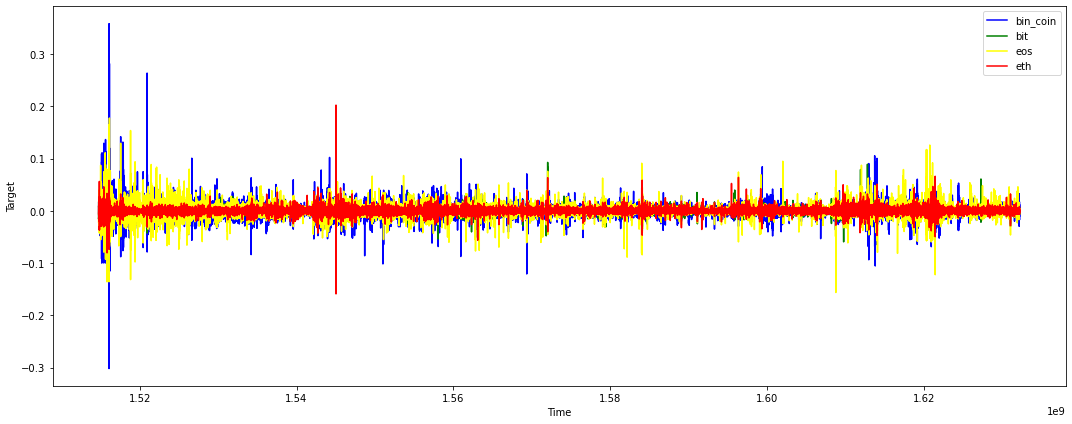

In [56]:
# visualize the target of each cryptocurrencies
plt.figure(figsize=(15,6))

plt.plot(bin_coin['Target'], label='bin_coin', color="blue")
plt.plot(bit['Target'], label='bit', color="green")
plt.plot(eos['Target'], label='eos', color="yellow")
plt.plot(eth['Target'], label='eth', color="red")

plt.legend()
plt.xlabel('Time')
plt.ylabel('Target')

plt.tight_layout()
plt.show()

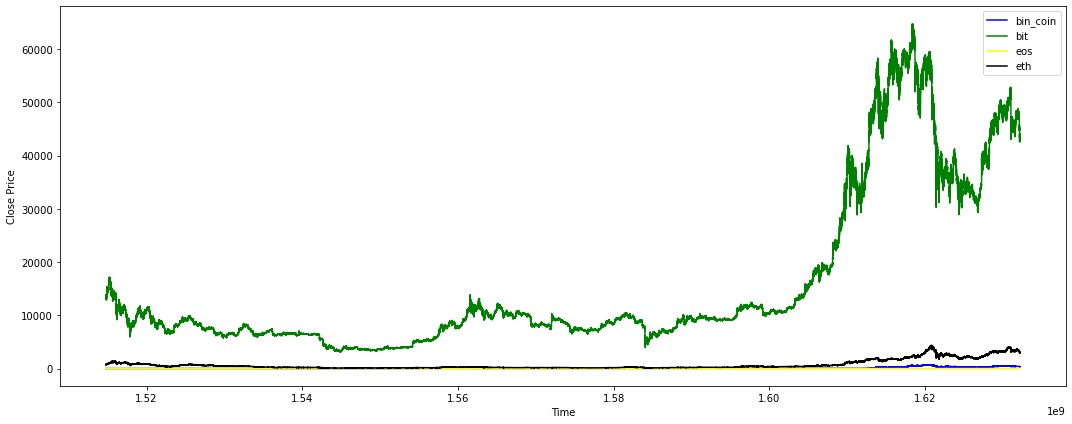

In [57]:
# visualize the close price of each cryptocurrencies
plt.figure(figsize=(15,6))

plt.plot(bin_coin['Close'], label='bin_coin', color="blue")
plt.plot(bit['Close'], label='bit', color="green")
plt.plot(eos['Close'], label='eos', color="yellow")
plt.plot(eth['Close'], label='eth', color="black")

plt.legend()
plt.xlabel('Time')
plt.ylabel('Close Price')

plt.tight_layout()
plt.show()

In [ ]:
# above just some examples, create any plots which you think is good

# YOUR CODE HERE

### Connect to SQL Database

In [ ]:
# Connect to SQL Database

# YOUR CODE HERE